In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

weather_df = pd.read_csv('data/philadelphia_weather_2005_to_2025.csv')
weather_df = weather_df.assign(date=pd.to_datetime(weather_df['date']))

#### Question 1: How did the low and high temperature on Christmas day change over time?

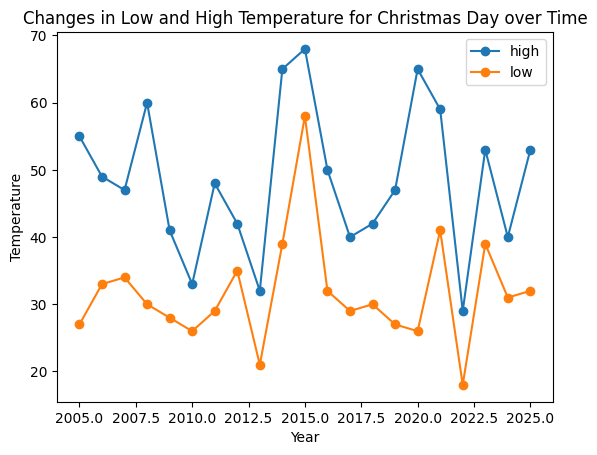

In [2]:
christmas_df = weather_df.query("day=='December 25'").set_index('year')[['high','low']]
christmas_df.plot(kind = 'line', style = '-o')
plt.title("Changes in Low and High Temperature for Christmas Day over Time")
plt.ylabel("Temperature")
plt.xlabel("Year")

plt.show()

From the plot above, we can see that the temperatures on Christmas day fluctuate fairly significantly year by year.

In [3]:
print(f"Hottest Christmas: {christmas_df['high'].idxmax()}, {christmas_df['high'].max()} degrees F.")
print(f"Coldest Christmas: {christmas_df['low'].idxmin()}, {christmas_df['low'].min()} degrees F.")
print(f"Greatest temperature change: {(christmas_df['high'] - christmas_df['low']).idxmax()}, with a temperature difference between high and low of {(christmas_df['high'] - christmas_df['low']).max()} degrees Farenheit.")

Hottest Christmas: 2015, 68 degrees F.
Coldest Christmas: 2022, 18 degrees F.
Greatest temperature change: 2020, with a temperature difference between high and low of 39 degrees Farenheit.


The hottest Christmas in the dataset was in 2015, with a high temperature of 68 degrees Farenheit.
An additional interesting fact is that 2015 was the hottest Christmas in any year from 1874 to 2025, tied only with Christmas in 1964. (According to https://www.stormfax.com/phlChristmasWx.htm)

The coldest Christmas in the dataset was in 2022, with a low temperature of 18 degrees Farenheit.
However, this is still 17 degrees Farenheit warmer than the coldest Christmas day, which was in 1980 and 1983, which had a minimum temperature of just 1 degree Farenheit. (https://www.stormfax.com/phlChristmasWx.htm)

The Christmas with the greatest temperature change was in 2020, with a temperature difference between high and low of 39 degrees Farenheit.

#### How did annual total snowfall change over time?

NameError: name 'yearly_avg' is not defined

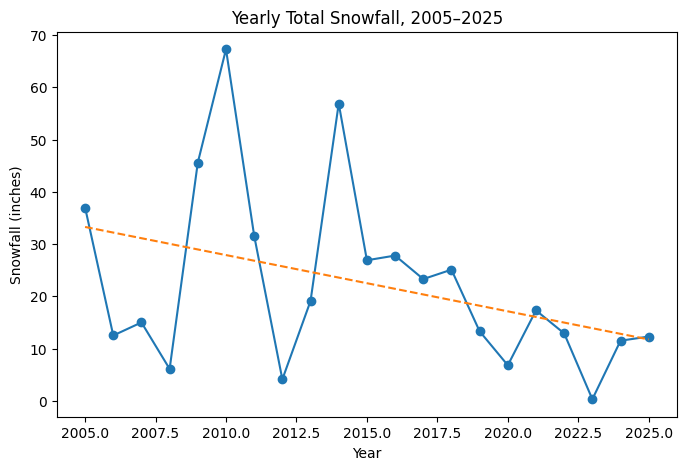

In [4]:
annual_snow = weather_df.groupby('year')['snow'].sum()

x = annual_snow.index.values
y = annual_snow.values

slope, intercept = np.polyfit(x, y, 1)
y_hat = intercept + slope * x

plt.figure(figsize=(8,5))

plt.plot(x, y, '-o', label='Observed')
plt.plot(x, y_hat, '--', label='Regression line')

plt.title("Yearly Total Snowfall, 2005–2025")
plt.xlabel("Year")
plt.ylabel("Snowfall (inches)")

plt.xticks(yearly_avg.index[::2])
plt.legend()
plt.show()

annual_snow.sort_values(ascending = True).head(5)
annual_snow.sort_values(ascending = False).head(5)

Based on the above regression line on the yearly total snowfall over the past 20 years, we can see that the amount of snow recorded in Philadelphia has decreased over the years.

2010 saw the greatest amount of snow in the data set receiving 67.3 inches, which is 11.6 inches more than 2014, the year with the second highest snowfall. An interesting fact is that during this year's snowstorm on January 26, certain parts of Philadelphia received 9.3 inches of snow, which is already more snow than the total yearly snowfall observed in 2023, 2012, 2008 and 2020.

#### More broadly: How did the yearly average temperature change from 2005-2025?

In [ ]:
weather_df['avg'] = (weather_df['high'] + weather_df['low']) / 2

yearly_avg = weather_df.groupby('year')['avg'].mean()

# Obtaining the index and values for the plot.
x = yearly_avg.index.values
y = yearly_avg.values

# Creating a regression line.
slope, intercept = np.polyfit(x, y, 1)
y_hat = intercept + slope * x

# Increasing size of plot.
plt.figure(figsize=(10,6))

# Plotting observed data and the regression line on the same plot.
plt.plot(x, y, '-o', label='Observed')
plt.plot(x, y_hat, '--', label='Regression line')

plt.title("Yearly Average Temperature, 2005–2025")
plt.xlabel("Year")
plt.ylabel("Temperature")

# Adjusting the indexing so only every two years labelled.
plt.xticks(yearly_avg.index[::2])
plt.legend()
plt.show()

print(f"Equation: y = {slope:.4f} * x + {intercept:.4f}")

From the plot above, we can see that there were many fluctuations in the yearly average temperature, with peaks in 2006, 2012, 2016, 2021, 2024.

The plotted regression line on the graph shows that the yearly average temperature increases as the years went by. More specifically, every year, the yearly average temperature goes up by 0.0907 degrees Farenheit on average. The fitted trend suggests an increase in average temperature over this period, though year-to-year variability is still large.

#### How did the highest and lowest recorded temperatures for each year change over time?

In [ ]:
highest_temps = weather_df.groupby('year')['high'].max()
lowest_temps = weather_df.groupby('year')['low'].min()

x = highest_temps.index.values

plt.figure(figsize=(10,6))

plt.plot(x, highest_temps, label='Annual max temp')
plt.plot(x, lowest_temps, label='Annual min temp')

plt.xlabel("Year")
plt.ylabel("Temperature")
plt.title("Annual Highest and Lowest Temperatures")
plt.legend()
plt.show()

mean_max_temp = highest_temps.mean()
mean_min_temp = lowest_temps.mean()

print(f"Mean annual max temp: {mean_max_temp:.2f}")
print(f"Mean annual min temp: {mean_min_temp:.2f}")

std_max_temp = highest_temps.std()
std_min_temp = lowest_temps.std()

print(f"Std dev of annual max temp: {std_max_temp:.2f}")
print(f"Std dev of annual min temp: {std_min_temp:.2f}")

year_highest_max = highest_temps.idxmax()
year_lowest_min = lowest_temps.idxmin()

print(f"Year with highest annual max temp: {year_highest_max}, temp: {highest_temps.max()}")
print(f"Year with lowest annual min temp: {year_lowest_min}, temp: {lowest_temps.min()}")

The annual maximum temperatures were fairly consistent throughout the 20 years, with a standard deviation of 2.16 degrees and an average maximum temperature of 98.19 degrees. The year with the hottest day was in 2010, with a temperature of 103 degrees, which interestingly enough was the year with the highest recorded annual snowfall in the dataset.

Annual minimum temperatures have greater temperature fluctuation, with standard deviation of 4.57 degrees. The average annual minimum temperatures was 9.52 degrees. The year with the coldest day was in 2015 at 2 degrees.